# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  

# define y for output dataset
y = np.array([[0],
            [1],
            [1],
            [0]])

In [2]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

# define syn1
syn0_history = [syn0]
syn1_history = [syn1]

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）



神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [3]:
for j in range(30000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l2_error = y - l2
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)
    
    '''
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
     # syn1 update weights
    '''
print("Output After Training:")
print(l1)
print("\n\n")
print(l1)

L2_Error:0.4964100319027255
L1_Error:0.4964100319027255
L2_Error:0.008584525653247153
L1_Error:0.008584525653247153
L2_Error:0.005789459862507812
L1_Error:0.005789459862507812
Output After Training:
[[6.95575162e-01 1.23557729e-01 9.23295488e-01 9.96399594e-01]
 [1.80042870e-01 4.68602366e-04 1.72600014e-02 8.92539916e-01]
 [9.94691790e-01 8.87830602e-01 2.32799129e-02 8.22206919e-01]
 [9.47390083e-01 2.56468223e-02 3.47759112e-05 1.21876577e-01]]



[[6.95575162e-01 1.23557729e-01 9.23295488e-01 9.96399594e-01]
 [1.80042870e-01 4.68602366e-04 1.72600014e-02 8.92539916e-01]
 [9.94691790e-01 8.87830602e-01 2.32799129e-02 8.22206919e-01]
 [9.47390083e-01 2.56468223e-02 3.47759112e-05 1.21876577e-01]]


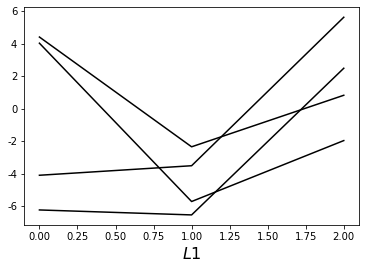

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

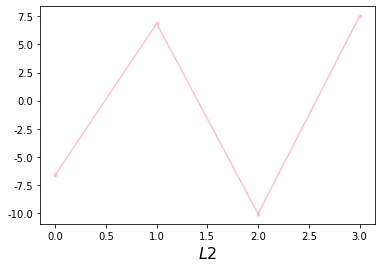

In [5]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [6]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[6.95575162e-01 1.23557729e-01 9.23295488e-01 9.96399594e-01]
 [1.80042870e-01 4.68602366e-04 1.72600014e-02 8.92539916e-01]
 [9.94691790e-01 8.87830602e-01 2.32799129e-02 8.22206919e-01]
 [9.47390083e-01 2.56468223e-02 3.47759112e-05 1.21876577e-01]]


In [7]:
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L2):
[[0.00378344]
 [0.99519922]
 [0.99570192]
 [0.00563475]]
